# Aufgabe 4
## Aufgabe 4.1
__Aufgabe:__ Erstellen einer Funktion tridiag(a,b,c,n).

Zunächst laden der benötigten Pakete:

In [1]:
from numpy import array, diag, ones, zeros

Wie in der Einführung werden wir die Aufgabe auf zwei Varianten lösen.
### Variante 1
Hier erstellen wir zunächst eine Nullmatrix passender Größe und ergänzen dann mittels einer Schleife die Einträge:

In [2]:
def tridiag_loop(a,b,c,n):
    A=zeros([n,n]) # Nullmatrix
    for iii in range(n): #Iteration über die Zeilen
        if iii==0: # die erste Zeile hat einen Eintrag weniger, muss daher extra behandelt werden
            A[iii,iii]=b # an dieser Stelle kennen wir eigentlich den Wert der Laufvariablen, dennoch ist konsistenter iii zu nutzen
            A[iii,iii+1]=c
        elif iii==n-1: # auch die letzte Zeile ist ein Sonderfall, dran denken, python startet das zählen der Indizes bei 0
            A[iii,iii]=b
            A[iii,iii-1]=a
        else: # der Regelfall
            A[iii,iii]=b
            A[iii,iii-1]=a
            A[iii,iii+1]=c
    return A # auf die Einrückung achten, damit wir nicht z.B. A nach dem ersten Durchlauf der for-Schleife zurück geben und das Programm beenden

Wir testen an zwei Beispielen, ob die Ausgabe so ist, wie erwartet:

In [3]:
tridiag_loop(-1,2,-1,5)

array([[ 2., -1.,  0.,  0.,  0.],
       [-1.,  2., -1.,  0.,  0.],
       [ 0., -1.,  2., -1.,  0.],
       [ 0.,  0., -1.,  2., -1.],
       [ 0.,  0.,  0., -1.,  2.]])

In [4]:
tridiag_loop(1,2,3,4)

array([[ 2.,  3.,  0.,  0.],
       [ 1.,  2.,  3.,  0.],
       [ 0.,  1.,  2.,  3.],
       [ 0.,  0.,  1.,  2.]])

### Variante 2
Zunächst wird eine Diagonalmatrix mit b auf der Diagonale von passender Größe erstellt. Anschließend werden (n-1)\*(n-1) Diagonalmatrizen auf die passenden Submatrizen addiert. 

In [5]:
def tridiag(a,b,c,n):
    A=diag(b*ones(n)) # Diagonalmatrix mit b auf der Diagonalen von passender Größe
    A[1:,:n-1]+=diag(a*ones(n-1)) # += die linke Seite wird um die rechte Seite erhöht
    A[:n-1,1:]+=diag(c*ones(n-1)) # A[:n-1,1:] ist die Matrix die sich durch entfernen der letzten Zeile und ersten Spalte aus A ergibt
    return A

Wir testen die selben Beispiele wie oben:

In [6]:
tridiag(-1,2,-1,5)

array([[ 2., -1.,  0.,  0.,  0.],
       [-1.,  2., -1.,  0.,  0.],
       [ 0., -1.,  2., -1.,  0.],
       [ 0.,  0., -1.,  2., -1.],
       [ 0.,  0.,  0., -1.,  2.]])

In [7]:
tridiag(1,2,3,4)

array([[ 2.,  3.,  0.,  0.],
       [ 1.,  2.,  3.,  0.],
       [ 0.,  1.,  2.,  3.],
       [ 0.,  0.,  1.,  2.]])

## Aufgabe 4.2

__Aufgabe:__ Stellen Sie damit 1d-Poissongleichungen auf, lösen Sie diese und stellen Sie die Ergebnisse graphisch dar.

Laden der notwendigen Befehle zum plotten und lösen der LGS:

In [8]:
import matplotlib.pyplot as plt
from numpy.linalg import solve
from numpy import arange, log

Zunächst für $f(x)=1$

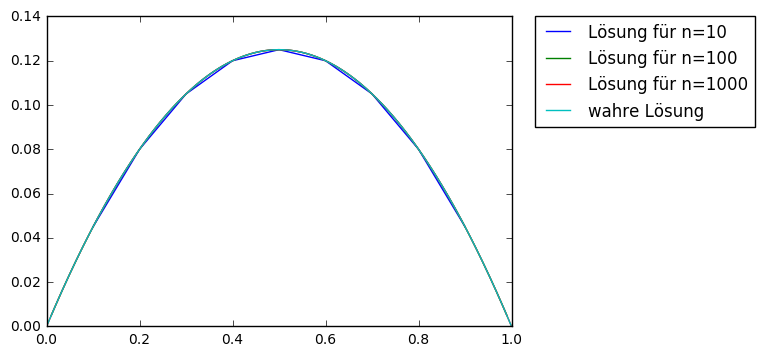

In [9]:
# Für welche Diskretisierungen wir lösen möchten
N=[10,100,1000]

for n in N:
    A=n**2*tridiag(-1,2,-1,n-1) # Poissonmatrix
    x=arange(1/n,1,1/n) # Koordinaten zum plotten und lösen des LGS
    rhs=ones(n-1) # rechte Seite des Gleichungssystems
    u=solve(A,rhs) # Lösen des Gleichungssystems
    plt.plot(x,u,label="Lösung für n={0}".format(n)) # Plot der Lösung 
y=array([-1/2*(t**2-t) for t in x]) #wahre Lösung
plt.plot(x,y,label='wahre Lösung') # plot der wahren Lösung
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # Setzten der Legende außerhalb de
plt.show()

Nun für $f(x)=-log(x)$

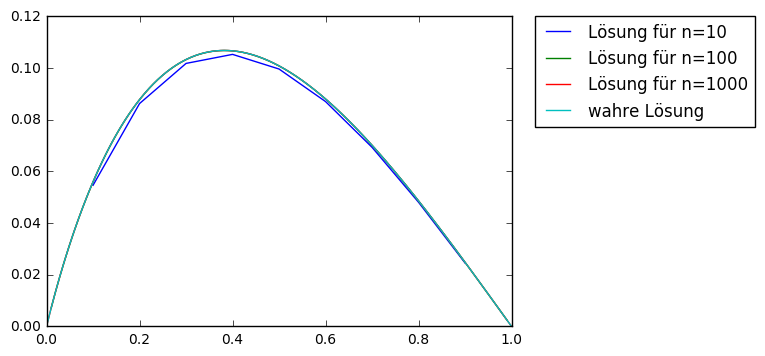

In [10]:
# Für welche Diskretisierungen wir lösen möchten
N=[10,100,1000]

for n in N:
    A=n**2*tridiag(-1,2,-1,n-1) # Poissonmatrix
    x=arange(1/n,1,1/n) # Koordinaten zum plotten und lösen des LGS
    rhs=-log(x) # rechte Seite des Gleichungssystems
    u=solve(A,rhs) # Lösen des Gleichungssystems
    plt.plot(x,u,label="Lösung für n={0}".format(n)) # Plot der Lösung 
y=array([1/4*t**2*(2*log(t)-3)+3/4*t for t in x]) #wahre Lösung
plt.plot(x,y,label='wahre Lösung') # plot der wahren Lösung
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()